Epoch 2

Importing libraries

In [64]:
# For array manipulation
import numpy as np
# For dataframes
import pandas as pd

# For model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#sklearn library for preprocessing data
from sklearn import preprocessing

#Classifying Models we will be using
#Decision Tree Classifier (DT)
from sklearn.tree import DecisionTreeClassifier
# Random Forest Classifier (RF)
from sklearn.ensemble import RandomForestClassifier
#XGB Classifier (XGB)
import xgboost 

# For data processing pipelines
from sklearn.pipeline import Pipeline, make_pipeline 

#Metrics for evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score
#For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [65]:
# Load the Wines dataset. Choosen .csv
data_r = pd.read_csv("winequality-red.csv", sep=';')
data_w = pd.read_csv("winequality-white.csv", sep=';')

# Display first few records
data_r.head()

,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
0,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."
1,"7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0...."
2,"7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0..."
3,"11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,..."
4,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."


In [66]:
#Implement containing data for getting better prediction
data = pd.concat([data_r, data_w], axis=0)

In [67]:
#Exploratory Data Analysis
# Targets column
target = data.quality
# Implement features
X = data.drop('quality', axis=1)

print('\nThe data has %d observations and %d features\n' %(X.shape[0], X.shape[1]))

#Analize Columns with missing data
print('Analyze missing observations the columns\n', (data.isnull().any()))

print('\nThere are', target.nunique(), 'Unique values for quality, namely:', sorted(target.unique()))



The data has 6497 observations and 12 features

Analyze missing observations the columns
 fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality    True
fixed acidity                                                                                                                                        True
volatile acidity                                                                                                                                     True
citric acid                                                                                                                                          True
residual sugar                                                                                                                                       True
chlorides                                                                                                                                  

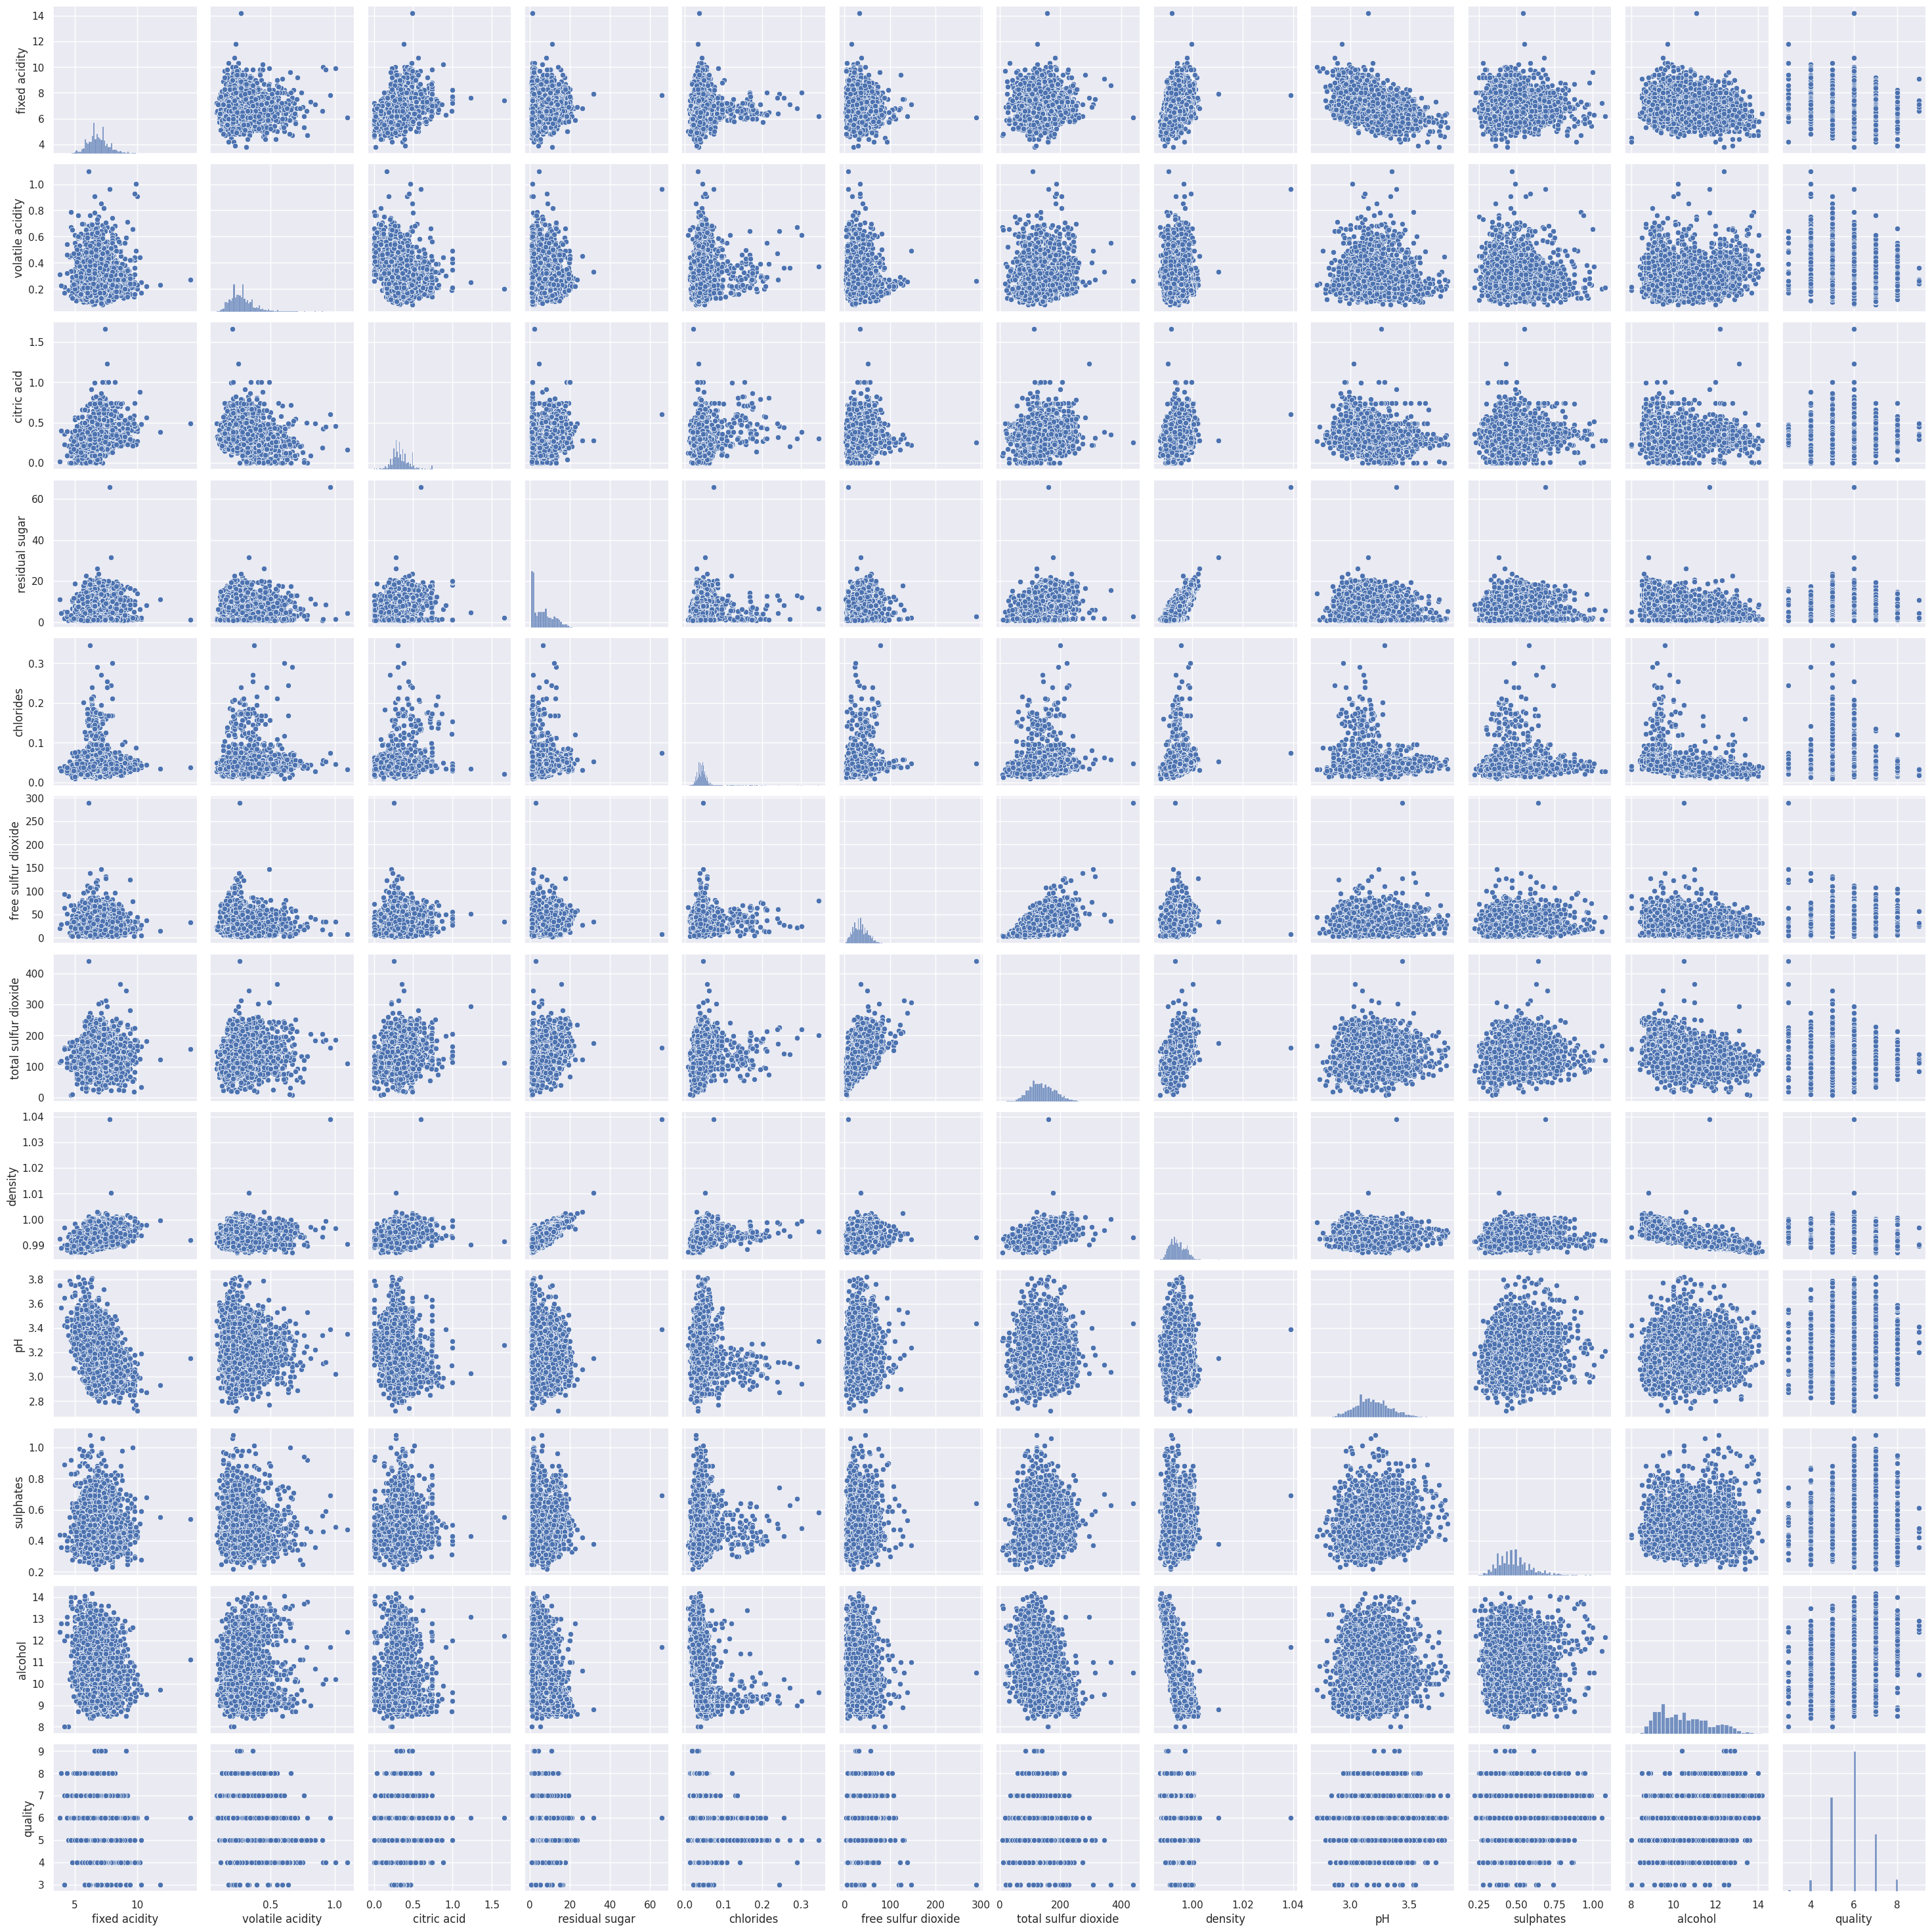

In [68]:
#View wine quality distribution (using pairplot)
sns.pairplot(data);

Epoch 3

The process of deviding data to bad or top quality and cleaning data

In [69]:
#Cleaning the data
feature = "quality"
Q1, Q3 = np.percentile(data[feature], q=25), np.percentile(data[feature], q=75)

# Interquartile range
outlier_range = 1.5 * (Q3 - Q1)

# Outliers in data
num_data = data[((data["quality"] < (Q1 - outlier_range)) | (data["quality"] > (Q3 + outlier_range)))].shape[0]

# Remove outliers outside the outlier range
data = data[~((data["quality"] < (Q1 - outlier_range)) | (data["quality"] > (Q3 + outlier_range)))].reset_index(drop = True)

# Display number of outliers
print("Number of outliers removed: ", num_data)

Number of outliers removed:  0


In [70]:
#The process of dividing data to bad or top quality
#top tier quality
# vgq = data[target>=6]
#bad quality
# bq = data[target<=5]

#print('%.2f %% of the wines are of top tier quality' %(100*len(vgq)/len(target)))
#print('%.2f %% of the wines are below average quality' %(100*len(bq)/len(target)))

View wine quality distribution

Graph of wines by quality, each section

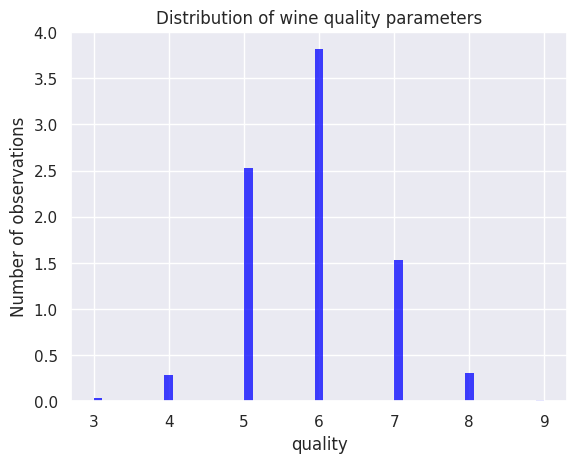

In [71]:
#Graph of wines by quality, each section
#sns.distplot(target, norm_hist=False, kde=False)
sns.histplot(target, color="blue", label="100% Equities", kde=False, stat="density", linewidth=0)

plt.title('Distribution of wine quality parameters')
plt.ylabel('Number of observations')
plt.show()

Preparing to split the analyzed data to identify the best wine

In [72]:
#Sampling data to obtain the best quality result
#&
#To eliminate losses, a copy is created and only it is changed
XX = X.copy()

XX['best_quality'] = 1
XX['best_quality'][target<7] = 0

XX.describe()

<ipython-input-72-310ad7783a0f>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  XX['best_quality'][target<7] = 0
<ipython-input-72-310ad7783a0f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best_quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,6497.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.409266
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.491736
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [73]:
# The targets composed of 2 classes (good and bad)
y = XX.best_quality
#Droping the targets column from the features dataframe
XX = XX.drop(['best_quality'], axis=1)

Correlation

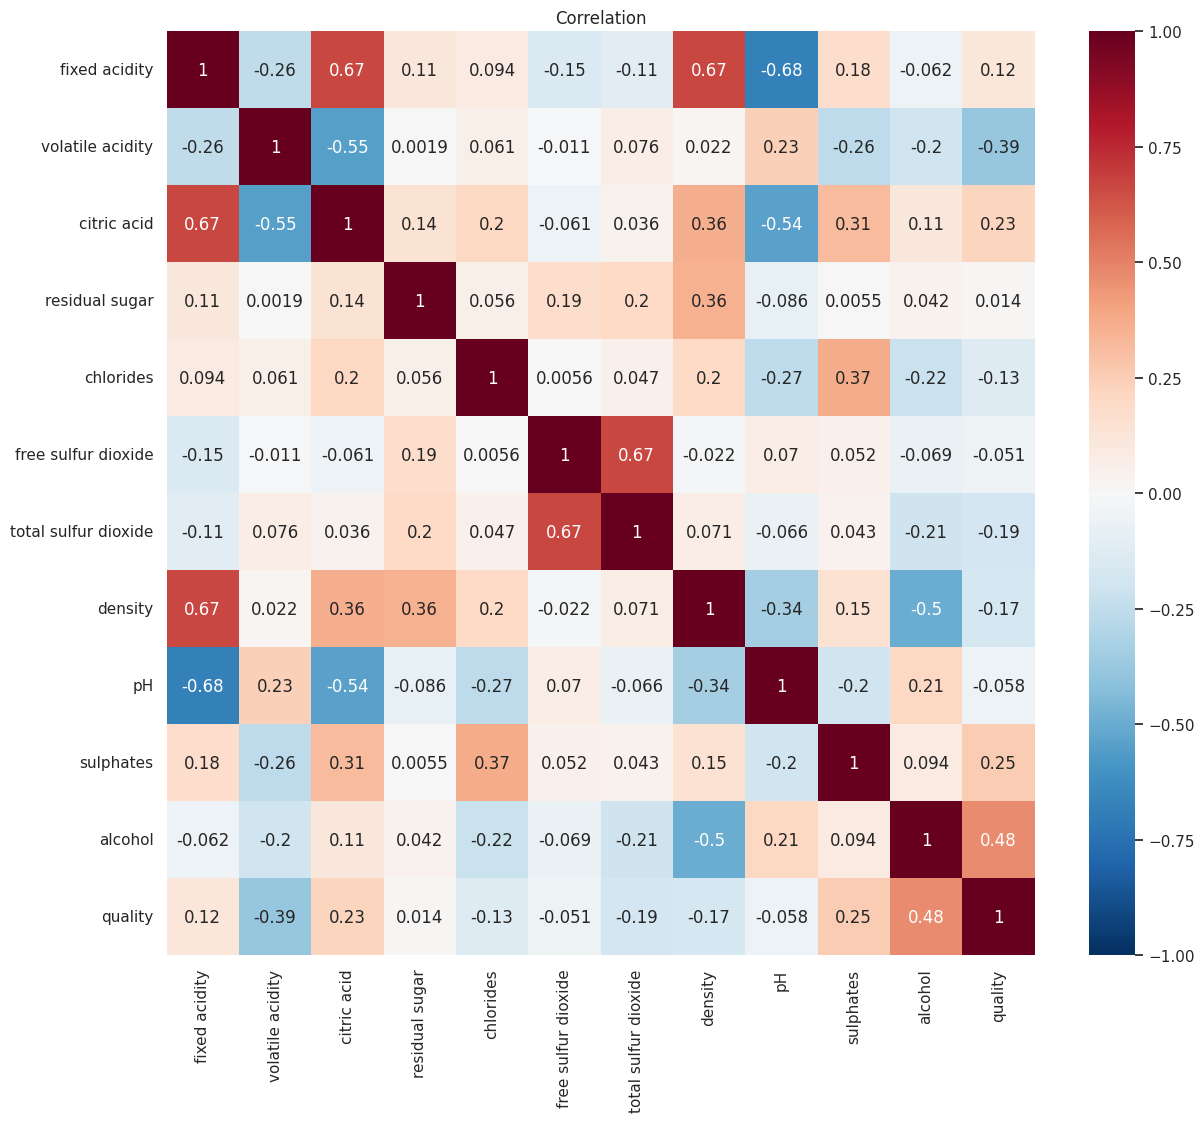

In [76]:
#Detection correlation
try:
    correlation = data.corr()
    print(correlation)
except ValueError:
    print(" ")


plt.figure(figsize=(14, 12))
plt.title('Correlation')
#Impementing data to heatmap
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

Splitting the data into training and test sets

In [77]:
#Implementing Variables
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=0, stratify=y)
# Analyze data for decting categorical variables
cat = [cname for cname in XX.columns if XX[cname].dtype=='object']
print('Here %d columns with categorical entries\n' %len(cat))



Here 1 columns with categorical entries



Epoch 4

**Models**

Models are compared to determine the best classification method with the most accurate prediction of wine quality. (Decision Tree Classifier, Random Forest Classifier, eXtreme Gradient Boosting Classifier)

(Model training)

In [78]:
def convert_to_float(x):
    """Converts comma-separated string to a list of floats."""
    try:
        # Attempt to convert the string to a list of floats
        return [float(val) for val in x.split(',')]
    except (ValueError, AttributeError):
        # If it cannot be converted, return the original value (e.g., if it is already numeric)
        return x

In [79]:
# Apply the function to each column of your DataFrame
for col in XX.columns:
    # Check if the data type is object (string) before applying the conversion
    if XX[col].dtype == 'object':
        # Using apply function to apply convert_to_float for each value in object type columns
        XX[col] = XX[col].apply(convert_to_float)

        # Split the list into multiple columns if needed
        if any(isinstance(i, list) for i in XX[col]):
            max_len = max(len(i) if isinstance(i, list) else 0 for i in XX[col])
            new_cols = pd.DataFrame(XX[col].apply(lambda x: x + [np.nan]*(max_len - len(x)) if isinstance(x, list) else [x, *([np.nan]*(max_len - 1))]).to_list(), index=XX.index, columns=[f"{col}_{i}" for i in range(max_len)])
            XX = pd.concat([XX, new_cols], axis=1)
            XX.drop(col, axis=1, inplace=True)

# Resplit the data after converting types
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=0, stratify=y)

In [80]:
#Model training
print('Defining the Classifiers and fitting them on training data...', '\n')
#Implementing DT to pipeline (Decision tree)
decTree_pipeline = Pipeline(steps=[('preprocessor', preprocessing.StandardScaler()),
                                   ('model', DecisionTreeClassifier(random_state=0))])
decTree_pipeline.fit(X_train, y_train)
#Implementing RF to pipeline  (Random forest)
RF = Pipeline(steps=[('preprocessor', preprocessing.StandardScaler()),
                     ('model', RandomForestClassifier(n_estimators=1000, random_state=0))])
RF.fit(X_train, y_train)

#Implementing XGB to pipeline (XGB classifier)
xgb = Pipeline(steps=[('preprocessor', preprocessing.StandardScaler()),
              ('model', xgboost.XGBClassifier(n_estimators=1000, learning_rate=0.05))])
xgb.fit(X_train, y_train)

Defining the Classifiers and fitting them on training data... 



Pipeline(steps=[('preprocessor', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

Model predictions (testing model)

In [81]:
#Testing part
#Model predictions DT
tree_pred = decTree_pipeline.predict(X_test)
#Model predictions RF
rf_pred = RF.predict(X_test)
#Model predictions XGB
xgb_pred = xgb.predict(X_test)



Classification Accuracy


In [82]:
print ('Accuracy: Decision Tree = %s%%' %(100*accuracy_score(y_test, tree_pred)))
print ('Accuracy: Random Forest = %s%%' %(100*accuracy_score(y_test, rf_pred)))
print ('Accuracy: XGB Clasificator = %s%%' %(100*accuracy_score(y_test, xgb_pred)))

Accuracy: Decision Tree = 86.03076923076924%
Accuracy: Random Forest = 89.96923076923076%
Accuracy: XGB Clasificator = 89.23076923076924%


Minimum Accuracy

Implementing the Confusion Matrix


In [83]:
print('A model that always predicts wine quality will be at least\
 accurate\n %.2f%% of the time' %(100*(1-y_test.mean())))

A model that always predicts wine quality will be at least accurate
 59.08% of the time


In [84]:
print('Confusion Matrix for Decision tree, XGB, and Random Forest classifiers:')
# y - actual classes || _pred - columns the predicted classes
print('Decision tree:\n',confusion_matrix(y_test,tree_pred),'\n')
print('XGB:\n',confusion_matrix(y_test,rf_pred),'\n')
print('Random Forest:\n',confusion_matrix(y_test, xgb_pred))

Confusion Matrix for Decision tree, XGB, and Random Forest classifiers:
Decision tree:
 [[847 113]
 [114 551]] 

XGB:
 [[925  35]
 [128 537]] 

Random Forest:
 [[914  46]
 [129 536]]


**Display confusion matrices (as heatmaps)**

The decision tree model classification

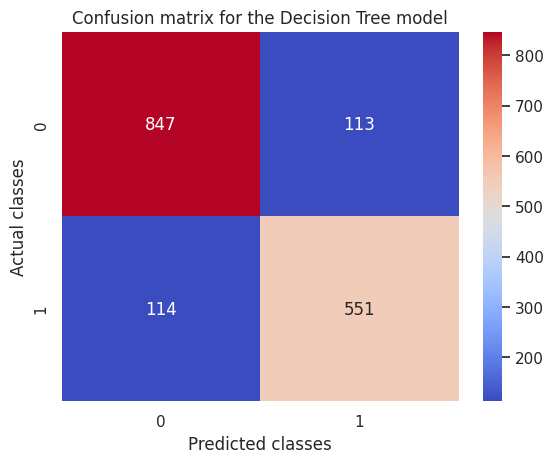

In [85]:
#The decision tree model classification
ax = plt.subplot()
#Entering data into a heatmap
sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, fmt='d', cmap='coolwarm')
ax.set_xlabel('Predicted classes')
ax.set_ylabel('Actual classes')
plt.title('Confusion matrix for the Decision Tree model')
plt.show()

The Random Forest model classification

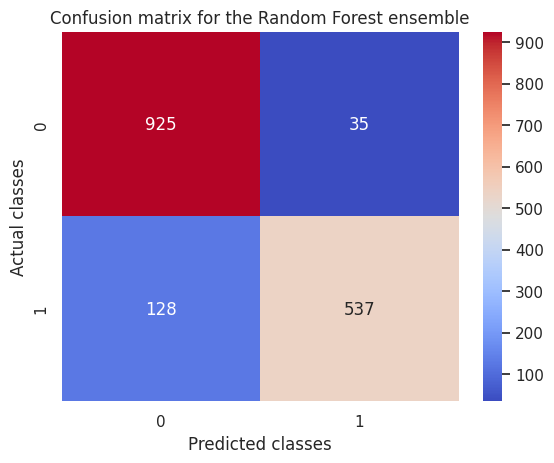

In [86]:
#The Random Forest model classification
ax = plt.subplot()
#Entering data into a heatmap
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='coolwarm')
ax.set_xlabel('Predicted classes')
ax.set_ylabel('Actual classes')
plt.title('Confusion matrix for the Random Forest ensemble')
plt.show()

The XGB model classification

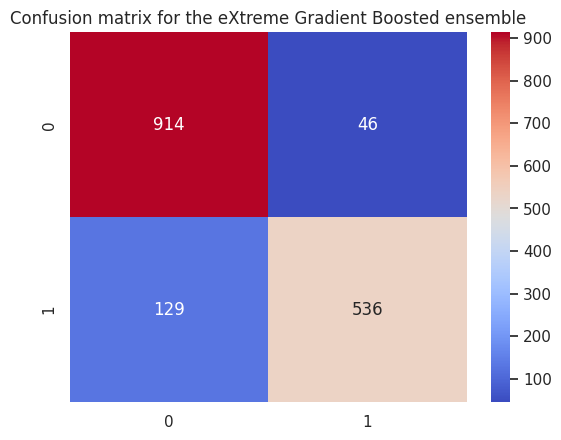

In [87]:
#The XGB model classification
coolwarmax = plt.subplot()
#Entering data into a heatmap
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='coolwarm')
ax.set_xlabel('Predicted classes')
ax.set_ylabel('Actual classes')
plt.title('Confusion matrix for the eXtreme Gradient Boosted ensemble')
plt.show()

Performance is summarized in the Classification report

In [88]:
#DT
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       960
           1       0.83      0.83      0.83       665

    accuracy                           0.86      1625
   macro avg       0.86      0.86      0.86      1625
weighted avg       0.86      0.86      0.86      1625



In [89]:
#RF
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       960
           1       0.94      0.81      0.87       665

    accuracy                           0.90      1625
   macro avg       0.91      0.89      0.89      1625
weighted avg       0.90      0.90      0.90      1625



In [90]:
#XGB
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       960
           1       0.92      0.81      0.86       665

    accuracy                           0.89      1625
   macro avg       0.90      0.88      0.89      1625
weighted avg       0.89      0.89      0.89      1625



Implementing the Receiver Operating Characteristic (ROC) curve to find the balance between sensitivity and specificity

Probabilistic predictions

In [91]:
#Probability estimation for all classes
#DT
tree_pred_prob = decTree_pipeline.predict_proba(X_test)[:,1]
#RF
rf_pred_prob = RF.predict_proba(X_test)[:,1]
#XGB
xgb_pred_prob = xgb.predict_proba(X_test)[:,1]

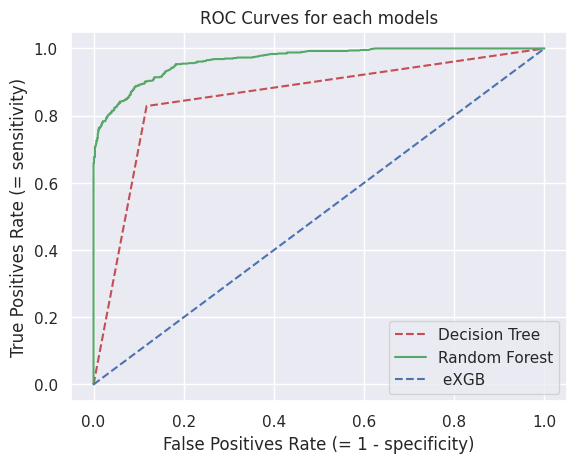

In [92]:
#Impementing data to ROC curve
fp_tree, tp_tree, thresh_tree = roc_curve(y_test, tree_pred_prob)
fp_rf, tp_rf, thresh_rf = roc_curve(y_test, rf_pred_prob)
fp_xgb, tp_xgb, thresh_xgb = roc_curve(y_test, xgb_pred_prob)

#Impementing information about the line into box
plt.plot(fp_tree, tp_tree, 'r--', label='Decision Tree')
plt.plot(fp_rf, tp_rf, 'g-', label='Random Forest')
plt.plot(fp_xgb, fp_xgb, 'b--', label=' eXGB')
#Title
plt.title('ROC Curves for each models')
#Impementing axis's names XoY
#X
plt.ylabel('True Positives Rate (= sensitivity)')
#Y
plt.xlabel('False Positives Rate (= 1 - specificity)')
plt.legend(loc='best')
plt.show()

Area Under the Curve


In [93]:
#Area Under the Curve for each of the classifiers
print('Decision Tree AUC:\t %.2f%%' %(100*roc_auc_score(y_test, tree_pred_prob)))
print('Random Forest AUC:\t %.2f%%'  %(100*roc_auc_score(y_test, rf_pred_prob)))
print('eXGB Classifier AUC: \t %.2f' %(100*roc_auc_score(y_test, xgb_pred_prob)))

Decision Tree AUC:	 85.54%
Random Forest AUC:	 96.59%
eXGB Classifier AUC: 	 95.22
